In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#scaling, encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#model building
import scipy.stats as stats
import statsmodels.api as sma

#train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

#performance matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,cohen_kappa_score,roc_auc_score,roc_curve

#when imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('DS_Interview_Virtual_Task_training_data.csv', index_col='ID') #since ID is having all unique records, i make it to index
df.head(2)

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1


# MUDRA LOAN DEFAULT DATASET

**Date_Of_Disbursement** :  The date on which the loan amount was disbursed to the borrower.        
**Business**  : Indicates the type of business, categorized as 'Existing' or 'New'.                   
**Jobs_Reatained**   : The number of jobs retained due to the loan.             
**Jobs_Created**     : The number of jobs created as a result of the loan.             
**Year_Of_Commitment** : The year when the commitment to provide the loan was made.          
**Guaranteed_Approved _Loan**: The amount of the loan approved, often guaranteed by a third party.   
**Borrower_Name**    : The name of the borrower receiving the loan.            
**Low_Documentation_Loan**  : Indicates whether the loan required minimal documentation ('Yes' or 'No').    
**Demography**       : The demographic classification, often based on location (e.g., Urban, Rural, Undefined).            
**State_Of_Bank**   : The state where the bank providing the loan is located.           
**ChargedOff_Amount** : The amount of the loan that has been charged off as a loss.           
**Borrower_City**     : The city where the borrower is located.           
**Borrower_State**   : The state where the borrower is located.           
**Gross_Amount_Balance** : The remaining balance of the loan.        
**Count_Employees**      : The number of employees in the borrower’s business.         
**Classification_Code**  : Code representing the classification of the loan or borrower.        
**Loan_Approved_Gross**  : The total amount approved for the loan.       
**Gross_Amount_Disbursed** : The total amount disbursed to the borrower.      
**Loan_Term**             : The duration of the loan in months or years.        
**Commitment_Date**       : The date on which the commitment to the loan was made.       
**Primary_Loan_Digit**    : Likely a primary identifier or code related to the loan.       
**Code_Franchise**        : Indicates if the borrower is a franchise (if applicable).        
**Name_Of_Bank**          : The name of the bank providing the loan.       
**Revolving_Credit_Line** : Indicates whether the loan includes a revolving credit line ('Yes' or 'No').      
**Default             : Indicates whether the loan defaulted (1) or not (0) ;("Target Variable")**

In [4]:
df.dtypes

Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

In [5]:
for i in df.columns:
    print(i)
    print("unique:",df[i].nunique())
    print("Value_counts:",df[i].value_counts())
    print("*"*40)

Date_Of_Disbursement
unique: 3505
Value_counts: 31-Jul-95    1111
30-Apr-95    1077
31-Jan-95    1064
31-Oct-94     946
31-Mar-06     922
             ... 
13-Dec-94       1
11-Feb-80       1
23-May-12       1
14-Jan-81       1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3505, dtype: int64
****************************************
Business
unique: 3
Value_counts: Existing    75091
New         29789
0             105
Name: Business, dtype: int64
****************************************
Jobs_Reatained
unique: 191
Value_counts: 0      48776
1      11242
2       9526
3       6452
4       4864
       ...  
199        1
104        1
177        1
220        1
400        1
Name: Jobs_Reatained, Length: 191, dtype: int64
****************************************
Jobs_Created 
unique: 128
Value_counts: 0       72288
1        8063
2        7256
3        3472
4        2485
        ...  
1016        1
125         1
167         1
205         1
1000        1
Name: Jobs_Created , Length: 128, 

In [6]:
df.duplicated().sum() # there is no duplicates in the dataset

0

In [7]:
df.isnull().sum()/len(df)
# we can see there were minute null values present, so i will drop those records

Date_Of_Disbursement         0.002238
Business                     0.000143
Jobs_Reatained               0.000000
Jobs_Created                 0.000000
Year_Of_Commitment           0.000000
Guaranteed_Approved _Loan    0.000000
Borrower_Name                0.000029
Low_Documentation_Loan       0.003495
Demography                   0.000000
State_Of_Bank                0.000000
ChargedOff_Amount            0.000000
Borrower_City                0.000000
Borrower_State               0.000000
Gross_Amount_Balance         0.000000
Count_Employees              0.000000
Classification_Code          0.000000
Loan_Approved_Gross          0.000000
Gross_Amount_Disbursed       0.000000
Loan_Term                    0.000000
Commitment_Date              0.000000
Primary_Loan_Digit           0.000000
Code_Franchise               0.000000
Name_Of_Bank                 0.000000
Revolving_Credit_Line        0.004676
Default                      0.000000
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
# cross check for null values
df.isnull().sum()

Date_Of_Disbursement         0
Business                     0
Jobs_Reatained               0
Jobs_Created                 0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Borrower_State               0
Gross_Amount_Balance         0
Count_Employees              0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Commitment_Date              0
Primary_Loan_Digit           0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Default                      0
dtype: int64

In [10]:
df.shape

(103894, 25)

In [11]:
103894/105000 #2% null values were dropped

0.9894666666666667

In [12]:
# I have observed my target variable is having 2 subclasses, so im making it to categorical datatype
df['Default'] = df['Default'].astype('O')

In [13]:
# I observed there are few subclasses which are unique and less count in 'Revolving_Credit_Line ', so im writing function
# Define a function to classify the values into two subclasses
def classify_credit_line(value):
    if value in ['No', '0']:
        return 'No'
    elif value in ['Yes', 'T']:
        return 'Yes'
    else:
        return 'Yes'  # Treat ambiguous values as 'Yes'

# Apply the function to create a new column
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].apply(classify_credit_line)
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].apply(classify_credit_line)

In [14]:
df.columns

Index(['Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ',
       'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [15]:
# renaming columns
df.rename(columns={'Jobs_Created ':'Jobs_Created','Year_Of_Commitment ':'Year_Of_Commitment', 'Borrower_Name ':'Borrower_Name', 
                  'Classification_Code ':'Classification_Code', 'Classification_Code ':'Classification_Code',
                  'ChargedOff_Amount ':'ChargedOff_Amount','Gross_Amount_Disbursed  ':'Gross_Amount_Disbursed',
                  'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan'}, inplace=True)

In [16]:
df.head(2)

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,No,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103894 entries, 0 to 104999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date_Of_Disbursement      103894 non-null  object
 1   Business                  103894 non-null  object
 2   Jobs_Reatained            103894 non-null  int64 
 3   Jobs_Created              103894 non-null  int64 
 4   Year_Of_Commitment        103894 non-null  object
 5   Guaranteed_Approved_Loan  103894 non-null  object
 6   Borrower_Name             103894 non-null  object
 7   Low_Documentation_Loan    103894 non-null  object
 8   Demography                103894 non-null  object
 9   State_Of_Bank             103894 non-null  object
 10  ChargedOff_Amount         103894 non-null  object
 11  Borrower_City             103894 non-null  object
 12  Borrower_State            103894 non-null  object
 13  Gross_Amount_Balance      103894 non-null  object
 14  Coun

In [18]:
num= df.select_dtypes(include=np.number) # all numerical columns
cat= df.select_dtypes(exclude=np.number) # all categorical columns

In [19]:
num.head(2)

,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise
ID,,,,,,,
0,0,0,38,0,126,4419763001,1
1,0,6,6,451120,123,1709796003,1


In [20]:
num.nunique() # since 'Primary_Loan_Digit' is having all unique values, so im dropping that column

Jobs_Reatained            191
Jobs_Created              128
Count_Employees           280
Classification_Code      1199
Loan_Term                 344
Primary_Loan_Digit     103894
Code_Franchise           1202
dtype: int64

In [21]:
#dropping 'Primary_Loan_Digit' column
num.drop('Primary_Loan_Digit', axis=1, inplace=True)

In [22]:
num.columns

Index(['Jobs_Reatained', 'Jobs_Created', 'Count_Employees',
       'Classification_Code', 'Loan_Term', 'Code_Franchise'],
      dtype='object')

In [23]:
cat.nunique() 

Date_Of_Disbursement          3474
Business                         3
Year_Of_Commitment              91
Guaranteed_Approved_Loan     10065
Borrower_Name               100017
Low_Documentation_Loan           2
Demography                       3
State_Of_Bank                   34
ChargedOff_Amount            22886
Borrower_City                 1193
Borrower_State                  41
Gross_Amount_Balance             3
Loan_Approved_Gross           6186
Gross_Amount_Disbursed       23373
Commitment_Date               7670
Name_Of_Bank                   143
Revolving_Credit_Line            2
Default                          2
dtype: int64

In [24]:
#dropping 'Primary_Loan_Digit' column, bcz its having more than 50% unique records, also 0.01% other than 0 class were present
cat.drop(['Borrower_Name', 'Gross_Amount_Balance'], axis=1, inplace=True)

In [25]:
cat.columns

Index(['Date_Of_Disbursement', 'Business', 'Year_Of_Commitment',
       'Guaranteed_Approved_Loan', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Commitment_Date',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [26]:
cat['Default'].dtype

dtype('O')

Jobs_Reatained
skewness: 32.16932193135239


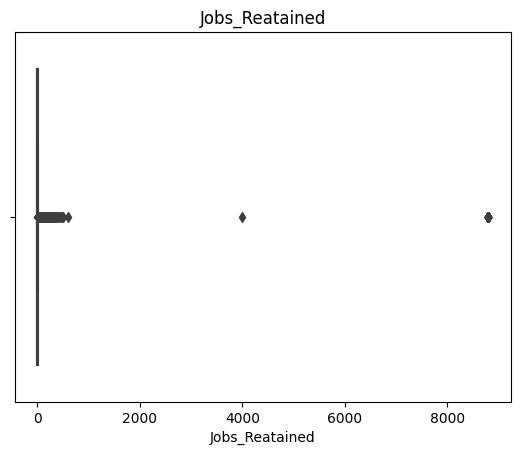

Jobs_Created
skewness: 32.24348479782385


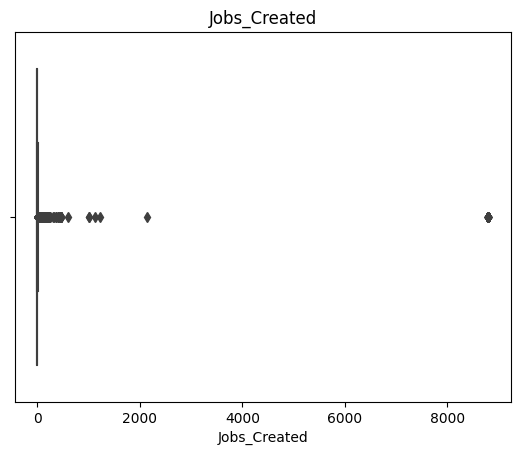

Count_Employees
skewness: 68.03169322953649


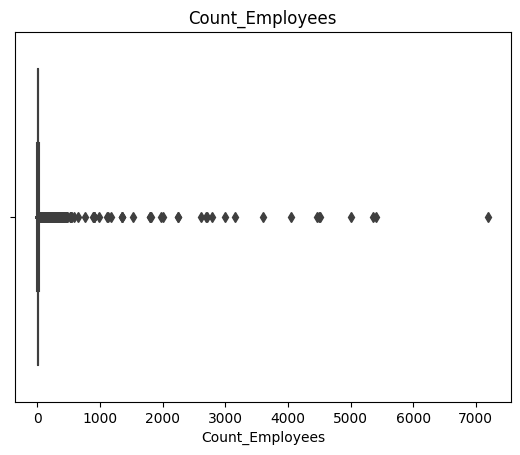

Classification_Code
skewness: -0.2971439128448176


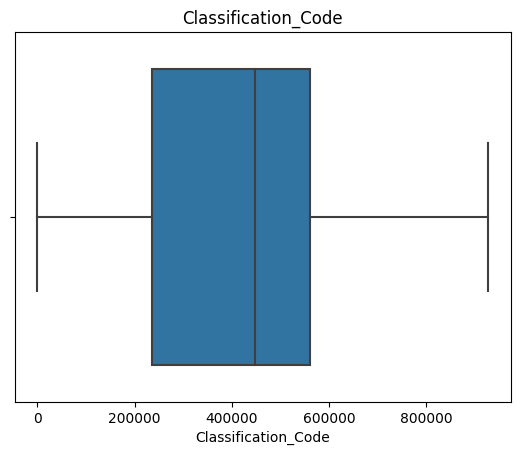

Loan_Term
skewness: 1.2052987423792054


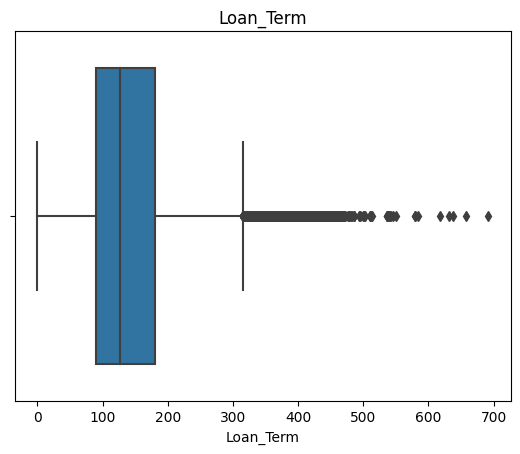

Code_Franchise
skewness: 5.0274291295752755


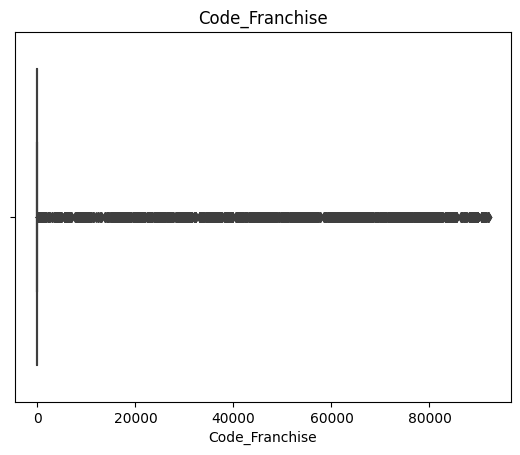

In [27]:
# checking for outliers
for i in num.columns:
    print(i)
    print('skewness:',num[i].skew())
    sns.boxplot(x=num[i])
    plt.title(i)
    plt.show()

In [28]:
# we can see huge outliers in few columns, so im doing capping
for i in num.columns:
    q1=num[i].quantile(0.25)
    q3=num[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    num[i]=num[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

Jobs_Reatained
skewness: 1.2146956556199313


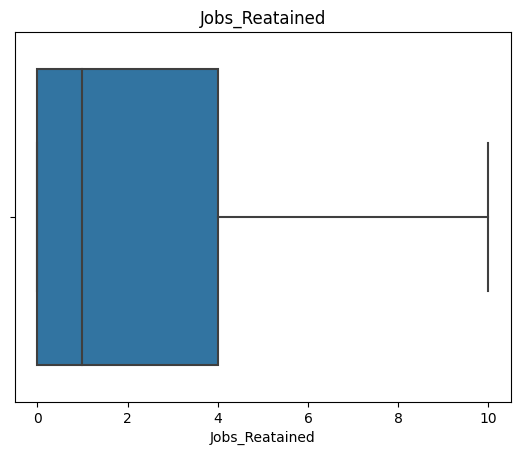

Jobs_Created
skewness: 1.1094258132995363


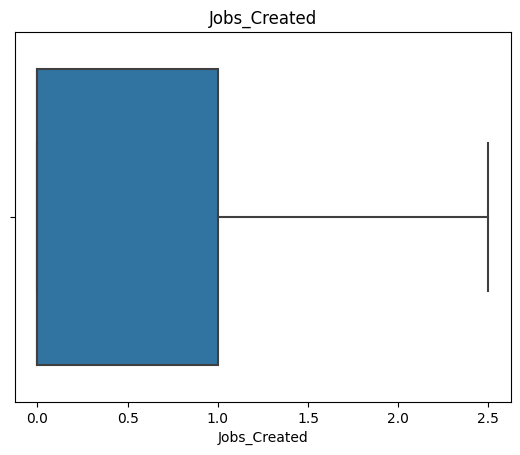

Count_Employees
skewness: 1.1940549263226674


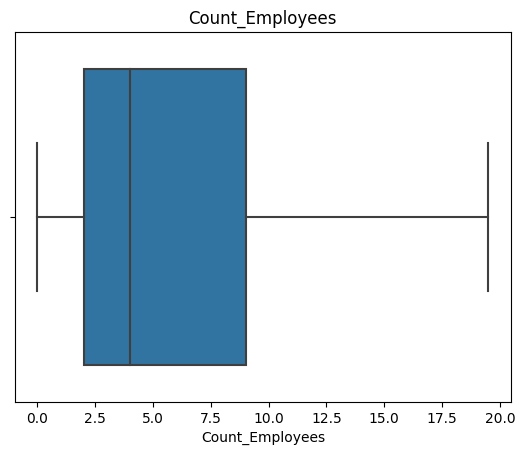

Classification_Code
skewness: -0.2971439128448176


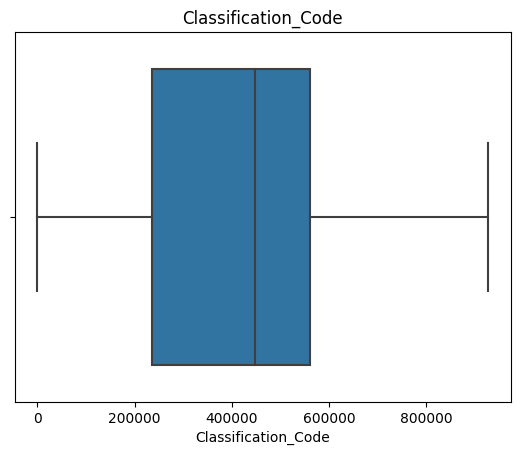

Loan_Term
skewness: 0.7672397649616863


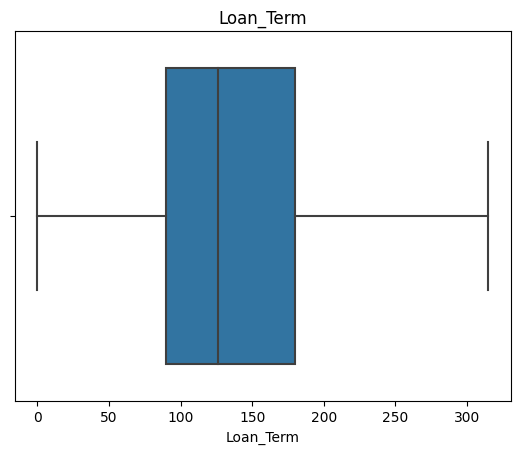

Code_Franchise
skewness: 0.5795194344812029


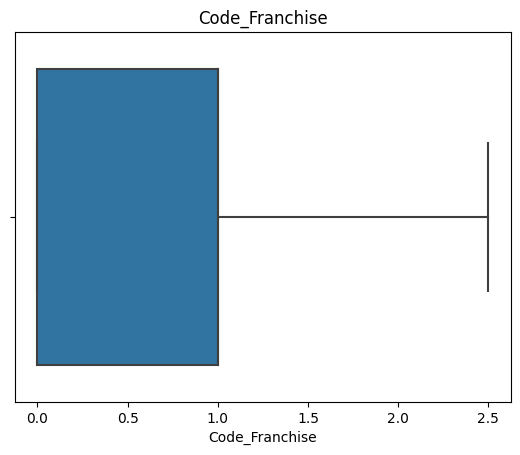

In [29]:
# again checking for outliers, after outlier treatement
for i in num.columns:
    print(i)
    print('skewness:',num[i].skew())
    sns.boxplot(x=num[i])
    plt.title(i)
    plt.show()

<AxesSubplot: >

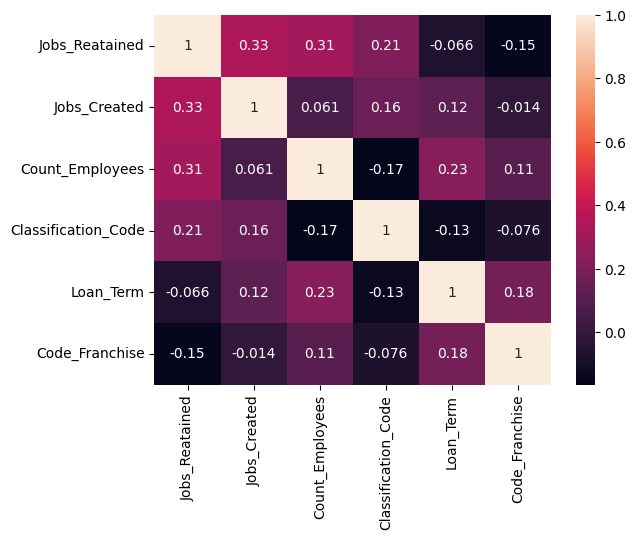

In [30]:
sns.heatmap(num.corr(), annot=True) # there is no strong correlation b/w independent variables

In [31]:
d=cat['Default'].value_counts()/len(cat)*100 # we can observe that 27% defaulters were there, so it is not imbalnced dataset
d

0    72.250563
1    27.749437
Name: Default, dtype: float64

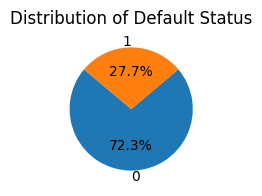

In [32]:
plt.figure(figsize=(2,2))
plt.pie(d, labels=d.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Default Status')
plt.show()

<Figure size 2000x1000 with 0 Axes>

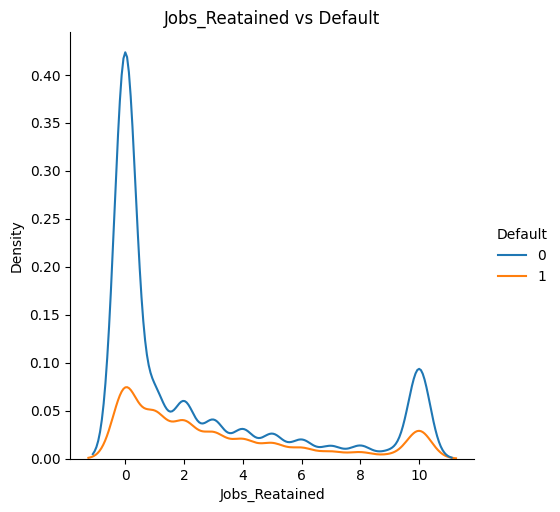

<Figure size 2000x1000 with 0 Axes>

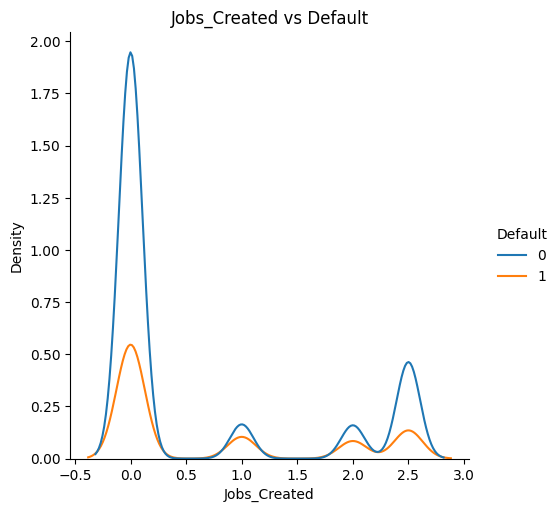

<Figure size 2000x1000 with 0 Axes>

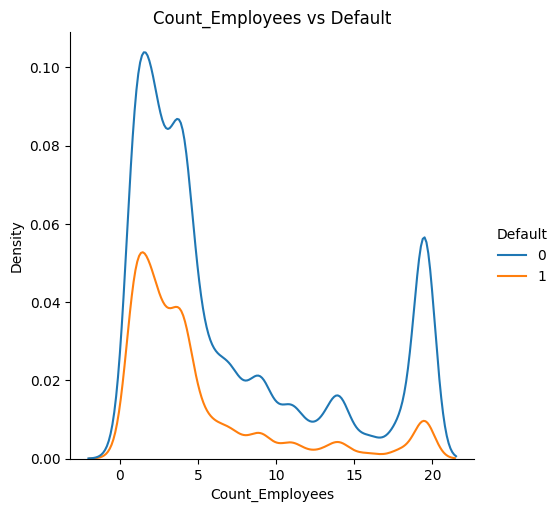

<Figure size 2000x1000 with 0 Axes>

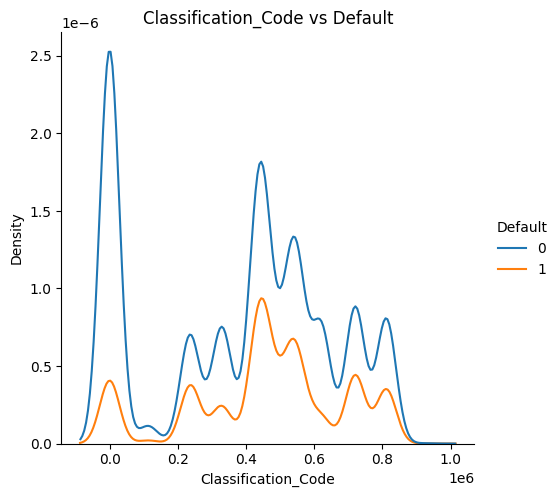

<Figure size 2000x1000 with 0 Axes>

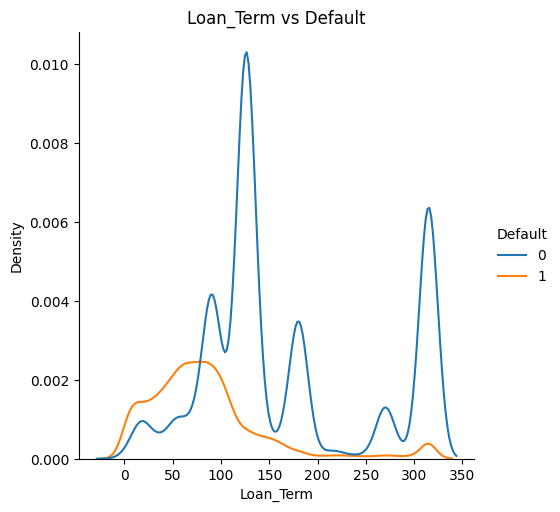

<Figure size 2000x1000 with 0 Axes>

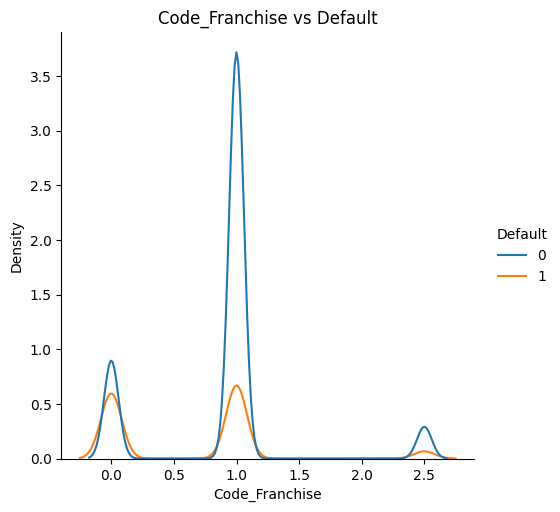

In [33]:
# to check for defaulters with each numerical columns
for i in num.columns:
    plt.figure(figsize=(20,10))
    sns.displot(x=num[i],kind='kde',hue=cat["Default"])
    plt.title(f"{i} vs Default")
    plt.show()

# to check for defaulters in each categorical columns
for i in cat.columns:
    plt.figure(figsize=(20,10))
    sns.countplot(x=cat[i],hue=df["Default"])
    plt.title(f"{i} vs Default")
    plt.tightlayout()
    plt.show()

In [34]:
for i in num.columns:
    print(i)
    print(f'mean:{num[i].mean()}, median:{num[i].median()}, mode:{num[i].mode()}')
    print('-'*40)

Jobs_Reatained
mean:2.553477582921054, median:1.0, mode:0    0.0
Name: Jobs_Reatained, dtype: float64
----------------------------------------
Jobs_Created
mean:0.628250909580919, median:0.0, mode:0    0.0
Name: Jobs_Created, dtype: float64
----------------------------------------
Count_Employees
mean:6.335149286773057, median:4.0, mode:0    1.0
Name: Count_Employees, dtype: float64
----------------------------------------
Classification_Code
mean:406231.54131133656, median:447110.0, mode:0    0
Name: Classification_Code, dtype: int64
----------------------------------------
Loan_Term
mean:144.53792326794618, median:126.0, mode:0    126.0
Name: Loan_Term, dtype: float64
----------------------------------------
Code_Franchise
mean:0.8286522802086742, median:1.0, mode:0    1.0
Name: Code_Franchise, dtype: float64
----------------------------------------


In [35]:
# Normality check
for i in num.columns:
    print(i,stats.jarque_bera(num[i])[1])
# since data is normally distributed, we will check variance

Jobs_Reatained 0.0
Jobs_Created 0.0
Count_Employees 0.0
Classification_Code 0.0
Loan_Term 0.0
Code_Franchise 0.0


In [36]:
# Variance check 'Jobs_Reatained' with all columns
for i in num.columns:
    print(i,stats.levene(num['Jobs_Reatained'], num[i])[1])

Jobs_Reatained 1.0
Jobs_Created 0.0
Count_Employees 0.0
Classification_Code 0.0
Loan_Term 0.0
Code_Franchise 0.0


In [37]:
cat["Default"].value_counts()

0    75064
1    28830
Name: Default, dtype: int64

In [38]:
cat.dtypes

Date_Of_Disbursement        object
Business                    object
Year_Of_Commitment          object
Guaranteed_Approved_Loan    object
Low_Documentation_Loan      object
Demography                  object
State_Of_Bank               object
ChargedOff_Amount           object
Borrower_City               object
Borrower_State              object
Loan_Approved_Gross         object
Gross_Amount_Disbursed      object
Commitment_Date             object
Name_Of_Bank                object
Revolving_Credit_Line       object
Default                     object
dtype: object

# since data satisfies both normalization and variance
#### im doing ttest for num vs cat
#### chi-square for cat vs cat

In [39]:
# Numerical Vs Categorical- ttest individual
for i in num.columns:
    x1= num[i][cat["Default"]==0] #non-defaulters with every numerical column
    x2= num[i][cat["Default"]==1] #defaulters with every numerical column
    print(i,stats.ttest_ind(x1,x2)[1]) 

Jobs_Reatained 6.621143650932055e-200
Jobs_Created 2.5463579294872606e-49
Count_Employees 0.0
Classification_Code 0.0
Loan_Term 0.0
Code_Franchise 0.0


In [40]:
# every numerical column is significant with the target column

In [41]:
# Categorical Vs Categorical- Chis Square test

# Ho: Reject the null hypothesis (p_value < alpha/level of significance)
# Ha: Fail to reject the null hypothesis (p_value > alpha/level of significance)

p_val=[]
for i in cat.columns:
    if i != "Default":  # Skip the target variable itself
        contingency=pd.crosstab(cat[i],cat["Default"])
        p_value=stats.chi2_contingency(contingency)[1]
        p_val.append(p_value)
    
    if p_value < 0.05:
        print(f"{i}, p_value {p_value}: There is a significant difference.")
    else:
        print(f"{i}, p_value {p_value}: No significant difference.")
    print("--------------------------------------------------------------------")

Date_Of_Disbursement, p_value 0.0: There is a significant difference.
--------------------------------------------------------------------
Business, p_value 1.9040682278818061e-13: There is a significant difference.
--------------------------------------------------------------------
Year_Of_Commitment, p_value 0.0: There is a significant difference.
--------------------------------------------------------------------
Guaranteed_Approved_Loan, p_value 0.0: There is a significant difference.
--------------------------------------------------------------------
Low_Documentation_Loan, p_value 1.5206415271364708e-214: There is a significant difference.
--------------------------------------------------------------------
Demography, p_value 0.0: There is a significant difference.
--------------------------------------------------------------------
State_Of_Bank, p_value 0.0: There is a significant difference.
--------------------------------------------------------------------
ChargedOff_Am

In [42]:
# we can see all categorical columns are significant with the target variable

In [43]:
for i in cat.columns:
    print(i)
    print("unique:",df[i].nunique())
    print("Value_counts:",df[i].value_counts())
    print("*"*40)

Date_Of_Disbursement
unique: 3474
Value_counts: 31-Jan-95    1060
31-Jul-95    1049
31-Oct-94     946
31-Mar-06     922
30-Apr-07     882
             ... 
19-Jan-94       1
31-Mar-87       1
13-Sep-78       1
13-Dec-94       1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3474, dtype: int64
****************************************
Business
unique: 3
Value_counts: Existing    74375
New         29415
0             104
Name: Business, dtype: int64
****************************************
Year_Of_Commitment
unique: 91
Value_counts: 2007    6751
2006    6748
2005    6699
2004    5432
2003    4470
        ... 
1972       2
1975       2
1971       2
1969       1
1976       1
Name: Year_Of_Commitment, Length: 91, dtype: int64
****************************************
Guaranteed_Approved_Loan
unique: 10065
Value_counts: Rs.2032000.0      6438
Rs.1016000.0      5150
Rs.406400.0       3803
Rs.4064000.0      3174
Rs.1422400.0      2148
                  ... 
Rs.41044368.0        1
Rs.87701

# Encoding

In [44]:
cat_e= cat.copy()

In [45]:
# year column encoding

cat_e['Year_Of_Commitment']=pd.to_datetime(cat_e['Year_Of_Commitment'], errors='coerce').dt.year
cat_e['Year_Of_Commitment']=cat_e['Year_Of_Commitment'].astype('Int64')

In [46]:
# encoding for date columns

def encode_dates(cat_e, date_columns):
    for i in date_columns:
        cat_e[i] = pd.to_datetime(cat_e[i], errors='coerce')
        cat_e[i + '_year'] = cat_e[i].dt.year
        cat_e[i + '_month'] = cat_e[i].dt.month
        cat_e[i + '_day'] = cat_e[i].dt.day
        cat_e.drop(columns=[i], inplace=True)
    return cat_e

In [47]:
date_columns = ['Date_Of_Disbursement','Commitment_Date']
cat_e = encode_dates(cat_e, date_columns)

In [48]:
# function to convert a column with monetary values (formatted as strings) to numeric values:

def convert_to_numeric(df, column_names):
    for column_name in column_names:
        df[column_name] = (
            df[column_name]
            .str.replace('Rs.', '', regex=False)  # Remove 'Rs.' prefix
            .str.replace(',', '', regex=False)    # Remove commas
            .astype(float)                        # Convert to float
        )
    return df

# List of columns to convert
columns_to_convert = ['Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed']

# Apply the function to the dataframe and columns
cat_e = convert_to_numeric(cat_e, columns_to_convert)

In [49]:
# One hot encoding

one_hot_encode_cols = ['Business', 'Low_Documentation_Loan', 'Demography', 'Revolving_Credit_Line']
cat_e = pd.get_dummies(cat_e, columns=one_hot_encode_cols, drop_first=True)

In [50]:
# Target Encoding

target_columns = ['State_Of_Bank', 'Borrower_City', 'Borrower_State', 'Name_Of_Bank']
target_variable = 'Default'

# Calculate global mean of the target variable
global_mean = cat_e[target_variable].mean()

def target_encode(df, column, target):
    # Calculate mean of the target for each category in the column
    target_mean = df.groupby(column)[target].mean()
    return df[column].map(target_mean)

# Apply target encoding to the specified columns
for col in target_columns:
    cat_e[col + '_encoded'] = target_encode(cat_e, col, target_variable)

# Drop original columns if desired
cat_e.drop(columns=target_columns, inplace=True)

In [51]:
cat_e['Default']= cat_e['Default'].astype(int)

In [52]:
cat_e.head()

,Year_Of_Commitment,Guaranteed_Approved_Loan,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Default,Date_Of_Disbursement_year,Date_Of_Disbursement_month,Date_Of_Disbursement_day,Commitment_Date_year,Commitment_Date_month,Commitment_Date_day,Business_Existing,Business_New,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes,State_Of_Bank_encoded,Borrower_City_encoded,Borrower_State_encoded,Name_Of_Bank_encoded
ID,,,,,,,,,,,,,,,,,,,,,,
0,1991,33121600.0,0.00,40640000.0,40640000.00,0,1991,7,31,1991,4,2,1,0,0,1,0,0,0.143432,0.201439,0.283417,0.179856
1,2006,32735520.0,38283367.68,43647360.0,43647360.00,1,2006,4,30,2006,4,10,0,1,0,0,1,0,0.319768,0.196319,0.218130,0.288927
2,2004,1422400.0,0.00,2844800.0,5961400.32,0,2004,6,30,2004,5,25,1,0,0,0,1,1,0.331643,0.224138,0.260189,0.293177
3,2006,2032000.0,0.00,4064000.0,4064000.00,0,2006,1,31,2005,12,21,0,1,0,0,1,1,0.314648,0.337900,0.276080,0.326034
4,2005,22981920.0,22862519.68,30642560.0,30642560.00,1,2004,12,31,2004,11,2,1,0,0,0,1,0,0.319768,0.326087,0.289961,0.189189


In [53]:
cat_e.dtypes

Year_Of_Commitment              Int64
Guaranteed_Approved_Loan      float64
ChargedOff_Amount             float64
Loan_Approved_Gross           float64
Gross_Amount_Disbursed        float64
Default                         int32
Date_Of_Disbursement_year       int64
Date_Of_Disbursement_month      int64
Date_Of_Disbursement_day        int64
Commitment_Date_year            int64
Commitment_Date_month           int64
Commitment_Date_day             int64
Business_Existing               uint8
Business_New                    uint8
Low_Documentation_Loan_Yes      uint8
Demography_Undefined            uint8
Demography_Urban                uint8
Revolving_Credit_Line_Yes       uint8
State_Of_Bank_encoded         float64
Borrower_City_encoded         float64
Borrower_State_encoded        float64
Name_Of_Bank_encoded          float64
dtype: object

In [54]:
cat_e.shape

(103894, 22)

In [55]:
cat_e.isnull().sum()

Year_Of_Commitment            3
Guaranteed_Approved_Loan      0
ChargedOff_Amount             0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Default                       0
Date_Of_Disbursement_year     0
Date_Of_Disbursement_month    0
Date_Of_Disbursement_day      0
Commitment_Date_year          0
Commitment_Date_month         0
Commitment_Date_day           0
Business_Existing             0
Business_New                  0
Low_Documentation_Loan_Yes    0
Demography_Undefined          0
Demography_Urban              0
Revolving_Credit_Line_Yes     0
State_Of_Bank_encoded         0
Borrower_City_encoded         0
Borrower_State_encoded        0
Name_Of_Bank_encoded          0
dtype: int64

In [56]:
df1=pd.concat([num,cat_e], axis=1)

# Move the 'Default' column to the end
cols = [i   for i in df1.columns    if i != 'Default'] + ['Default']
df1 = df1[cols]

In [57]:
df1.isnull().sum()

Jobs_Reatained                0
Jobs_Created                  0
Count_Employees               0
Classification_Code           0
Loan_Term                     0
Code_Franchise                0
Year_Of_Commitment            3
Guaranteed_Approved_Loan      0
ChargedOff_Amount             0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Date_Of_Disbursement_year     0
Date_Of_Disbursement_month    0
Date_Of_Disbursement_day      0
Commitment_Date_year          0
Commitment_Date_month         0
Commitment_Date_day           0
Business_Existing             0
Business_New                  0
Low_Documentation_Loan_Yes    0
Demography_Undefined          0
Demography_Urban              0
Revolving_Credit_Line_Yes     0
State_Of_Bank_encoded         0
Borrower_City_encoded         0
Borrower_State_encoded        0
Name_Of_Bank_encoded          0
Default                       0
dtype: int64

In [58]:
df1.dropna(inplace=True)

In [59]:
df1.isnull().sum().sum()

0

In [60]:
df1.duplicated().sum()

3

In [61]:
df1.drop_duplicates(inplace=True)

In [62]:
df1.duplicated().sum()

0

In [63]:
df1.shape

(103888, 28)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103888 entries, 0 to 104999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Jobs_Reatained              103888 non-null  float64
 1   Jobs_Created                103888 non-null  float64
 2   Count_Employees             103888 non-null  float64
 3   Classification_Code         103888 non-null  int64  
 4   Loan_Term                   103888 non-null  float64
 5   Code_Franchise              103888 non-null  float64
 6   Year_Of_Commitment          103888 non-null  Int64  
 7   Guaranteed_Approved_Loan    103888 non-null  float64
 8   ChargedOff_Amount           103888 non-null  float64
 9   Loan_Approved_Gross         103888 non-null  float64
 10  Gross_Amount_Disbursed      103888 non-null  float64
 11  Date_Of_Disbursement_year   103888 non-null  int64  
 12  Date_Of_Disbursement_month  103888 non-null  int64  
 13  Date_Of_Disbur

In [65]:
df1['Business_Existing']=df1['Business_Existing'].astype(int)
df1['Business_New']=df1['Business_New'].astype(int)
df1['Low_Documentation_Loan_Yes']=df1['Low_Documentation_Loan_Yes'].astype(int)
df1['Demography_Undefined']=df1['Demography_Undefined'].astype(int)
df1['Demography_Urban']=df1['Demography_Urban'].astype(int)
df1['Revolving_Credit_Line_Yes']=df1['Revolving_Credit_Line_Yes'].astype(int)

In [66]:
df1.dtypes

Jobs_Reatained                float64
Jobs_Created                  float64
Count_Employees               float64
Classification_Code             int64
Loan_Term                     float64
Code_Franchise                float64
Year_Of_Commitment              Int64
Guaranteed_Approved_Loan      float64
ChargedOff_Amount             float64
Loan_Approved_Gross           float64
Gross_Amount_Disbursed        float64
Date_Of_Disbursement_year       int64
Date_Of_Disbursement_month      int64
Date_Of_Disbursement_day        int64
Commitment_Date_year            int64
Commitment_Date_month           int64
Commitment_Date_day             int64
Business_Existing               int32
Business_New                    int32
Low_Documentation_Loan_Yes      int32
Demography_Undefined            int32
Demography_Urban                int32
Revolving_Credit_Line_Yes       int32
State_Of_Bank_encoded         float64
Borrower_City_encoded         float64
Borrower_State_encoded        float64
Name_Of_Bank

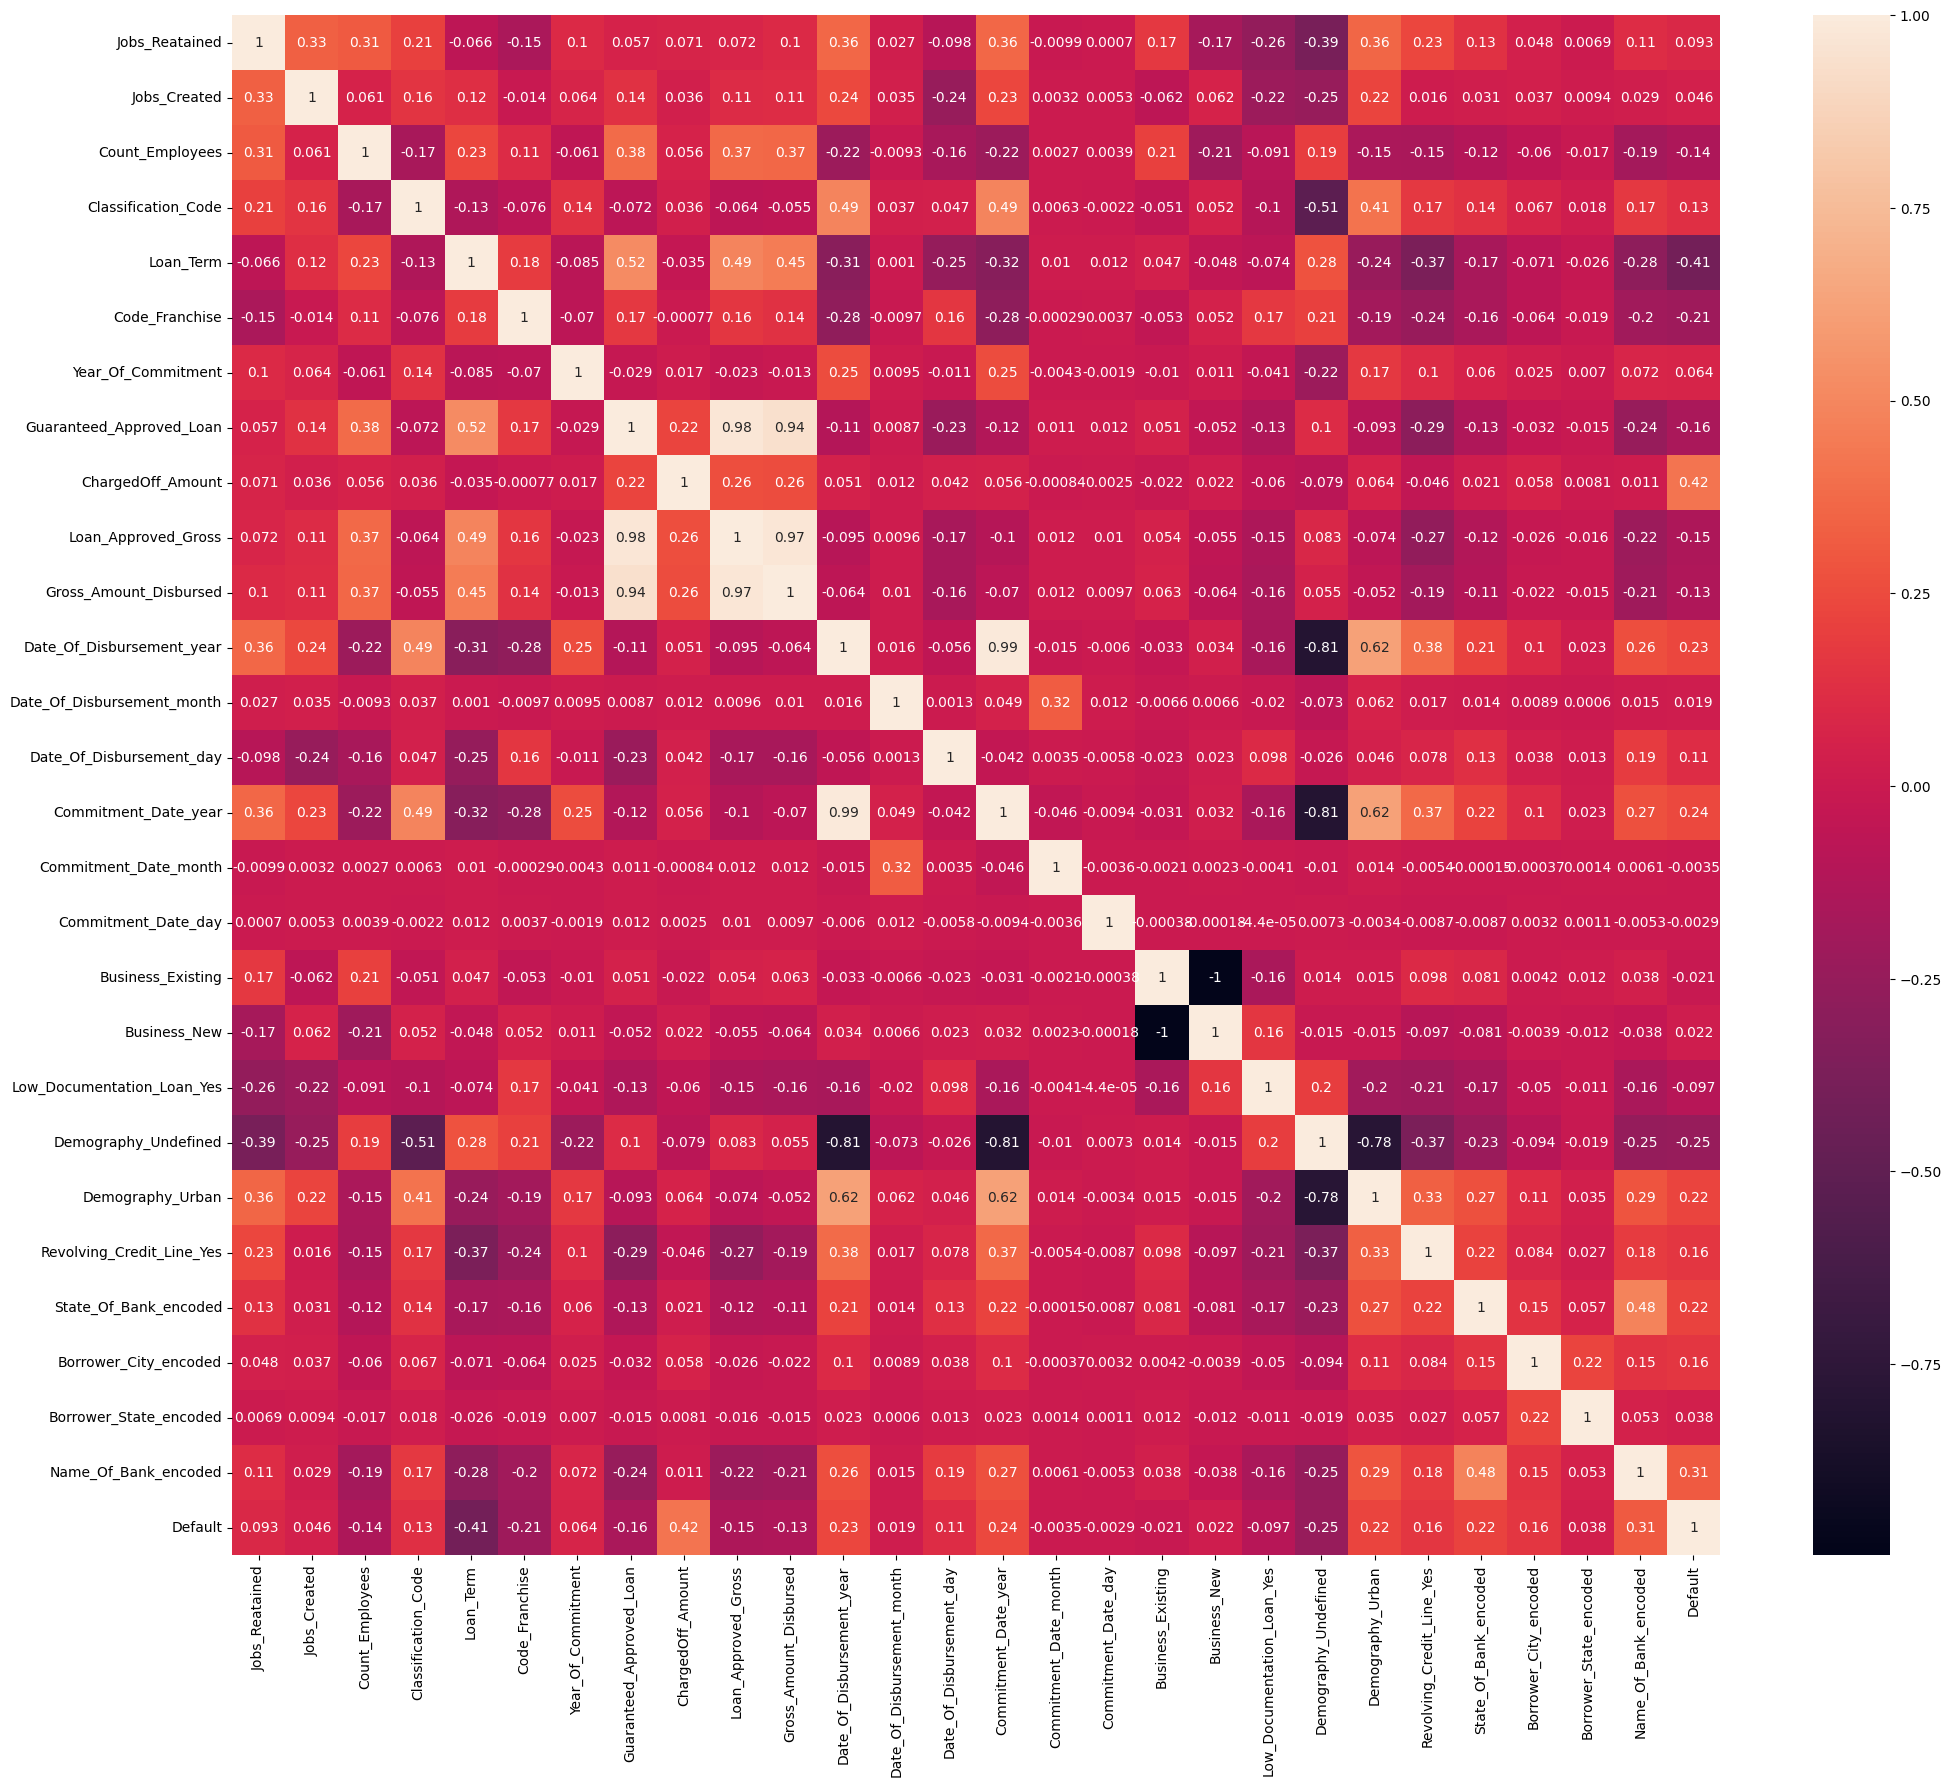

In [67]:
plt.figure(figsize=(24,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

# Train test split

In [68]:
X=df1.drop("Default",axis=1)
y=df1[["Default"]]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [69]:
y_train

,Default
ID,
1603,0
26267,1
92860,0
23537,0
67323,0
...,...
66329,1
78492,0
80537,0


# Logistic Regression

In [70]:
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
ypred=model_lr.predict(x_test)

In [71]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15051
           1       0.99      0.93      0.96      5727

    accuracy                           0.98     20778
   macro avg       0.98      0.96      0.97     20778
weighted avg       0.98      0.98      0.98     20778



In [72]:
cohen_kappa_score(y_test,ypred)

0.9445627193038844

In [73]:
roc_auc_score(y_test,ypred)

0.9641074371930269

# KNN

In [74]:
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(x_train,y_train)
ypred=knn.predict(x_test)


In [75]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15051
           1       0.99      0.98      0.98      5727

    accuracy                           0.99     20778
   macro avg       0.99      0.99      0.99     20778
weighted avg       0.99      0.99      0.99     20778



In [76]:
cohen_kappa_score(y_test,ypred)

0.9747431037032004

In [77]:
roc_auc_score(y_test,ypred)

0.9860799282091665

# DecisionTreeClassifier

In [78]:
# gini
dt=DecisionTreeClassifier(criterion="gini",random_state=100)
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_test)

In [79]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15051
           1       0.98      0.98      0.98      5727

    accuracy                           0.99     20778
   macro avg       0.99      0.98      0.99     20778
weighted avg       0.99      0.99      0.99     20778



In [80]:
cohen_kappa_score(y_test,ypred)

0.971506519049804

In [81]:
roc_auc_score(y_test,ypred)

0.9849125510369685

In [82]:
# entropy
dt=DecisionTreeClassifier(criterion="entropy",random_state=100)
model_dt=dt.fit(x_train,y_train)
ypred=model_dt.predict(x_test)

In [83]:
cohen_kappa_score(y_test,ypred)

0.9735862060102276

In [84]:
roc_auc_score(y_test,ypred)

0.9864508340578648

In [85]:
model_dt.feature_importances_

array([7.66321310e-04, 5.05165659e-04, 1.95032084e-03, 4.32363778e-03,
       4.45967995e-03, 0.00000000e+00, 1.04264763e-03, 1.35971910e-03,
       9.52648728e-01, 7.98634086e-04, 2.64860372e-03, 7.24691611e-03,
       1.47432518e-03, 1.83206408e-03, 1.66847637e-03, 1.16841842e-03,
       3.29745701e-03, 2.80847584e-04, 1.60768258e-04, 1.68095665e-04,
       2.05919825e-04, 2.00321116e-04, 3.08374327e-04, 1.40591763e-03,
       5.12567384e-03, 3.02602465e-03, 1.92694208e-03])

<AxesSubplot: xlabel='Importance', ylabel='Features'>

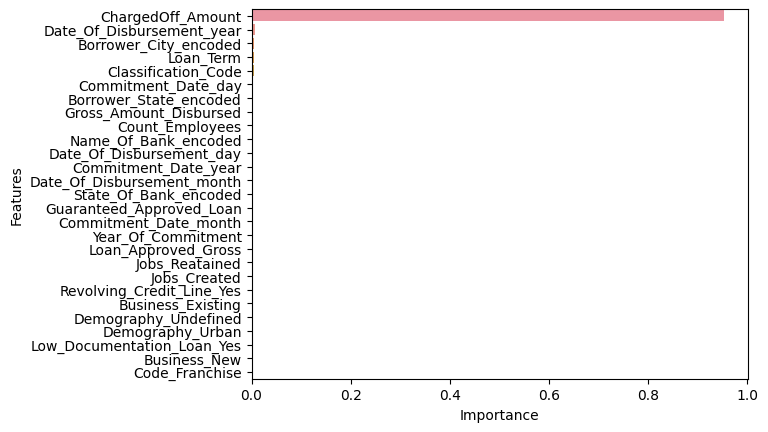

In [86]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': model_dt.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

In [87]:
important_features

,Features,Importance
8,ChargedOff_Amount,0.952649
11,Date_Of_Disbursement_year,0.007247
24,Borrower_City_encoded,0.005126
4,Loan_Term,0.004460
3,Classification_Code,0.004324
16,Commitment_Date_day,0.003297
25,Borrower_State_encoded,0.003026
10,Gross_Amount_Disbursed,0.002649
2,Count_Employees,0.001950
26,Name_Of_Bank_encoded,0.001927


# Random Forest Classifier

In [88]:
#gini
rf=RandomForestClassifier(criterion="gini",random_state=100)
model_rf=rf.fit(x_train,y_train)
ypred=model_rf.predict(x_test)

In [89]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15051
           1       0.98      1.00      0.99      5727

    accuracy                           0.99     20778
   macro avg       0.99      1.00      0.99     20778
weighted avg       0.99      0.99      0.99     20778



In [90]:
cohen_kappa_score(y_test,ypred)

0.9869143172692622

In [91]:
roc_auc_score(y_test,ypred)

0.9954054416485607

In [92]:
#entropy
rf=RandomForestClassifier(criterion="entropy",random_state=100)
model_rf=rf.fit(x_train,y_train)
ypred=model_rf.predict(x_test)

In [93]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15051
           1       0.98      1.00      0.99      5727

    accuracy                           0.99     20778
   macro avg       0.99      1.00      0.99     20778
weighted avg       1.00      0.99      0.99     20778



In [94]:
cohen_kappa_score(y_test,ypred)

0.9873972415862642

In [95]:
roc_auc_score(y_test,ypred)

0.9957546646274328

# Final Base model

In [96]:
base_df1=rf.fit(x_train,y_train)
ypred_train=base_df1.predict(x_train)
ypred_test=base_df1.predict(x_test)


In [97]:
print(classification_report(y_train,ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60010
           1       1.00      1.00      1.00     23100

    accuracy                           1.00     83110
   macro avg       1.00      1.00      1.00     83110
weighted avg       1.00      1.00      1.00     83110



In [98]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15051
           1       0.98      1.00      0.99      5727

    accuracy                           0.99     20778
   macro avg       0.99      1.00      0.99     20778
weighted avg       1.00      0.99      0.99     20778



In [100]:
print('accuracy train :', base_df1.score(x_train, y_train))
print('accuracy test :', base_df1.score(x_test, y_test))

accuracy train : 0.9999879677535796
accuracy test : 0.994946578111464


# Business insights

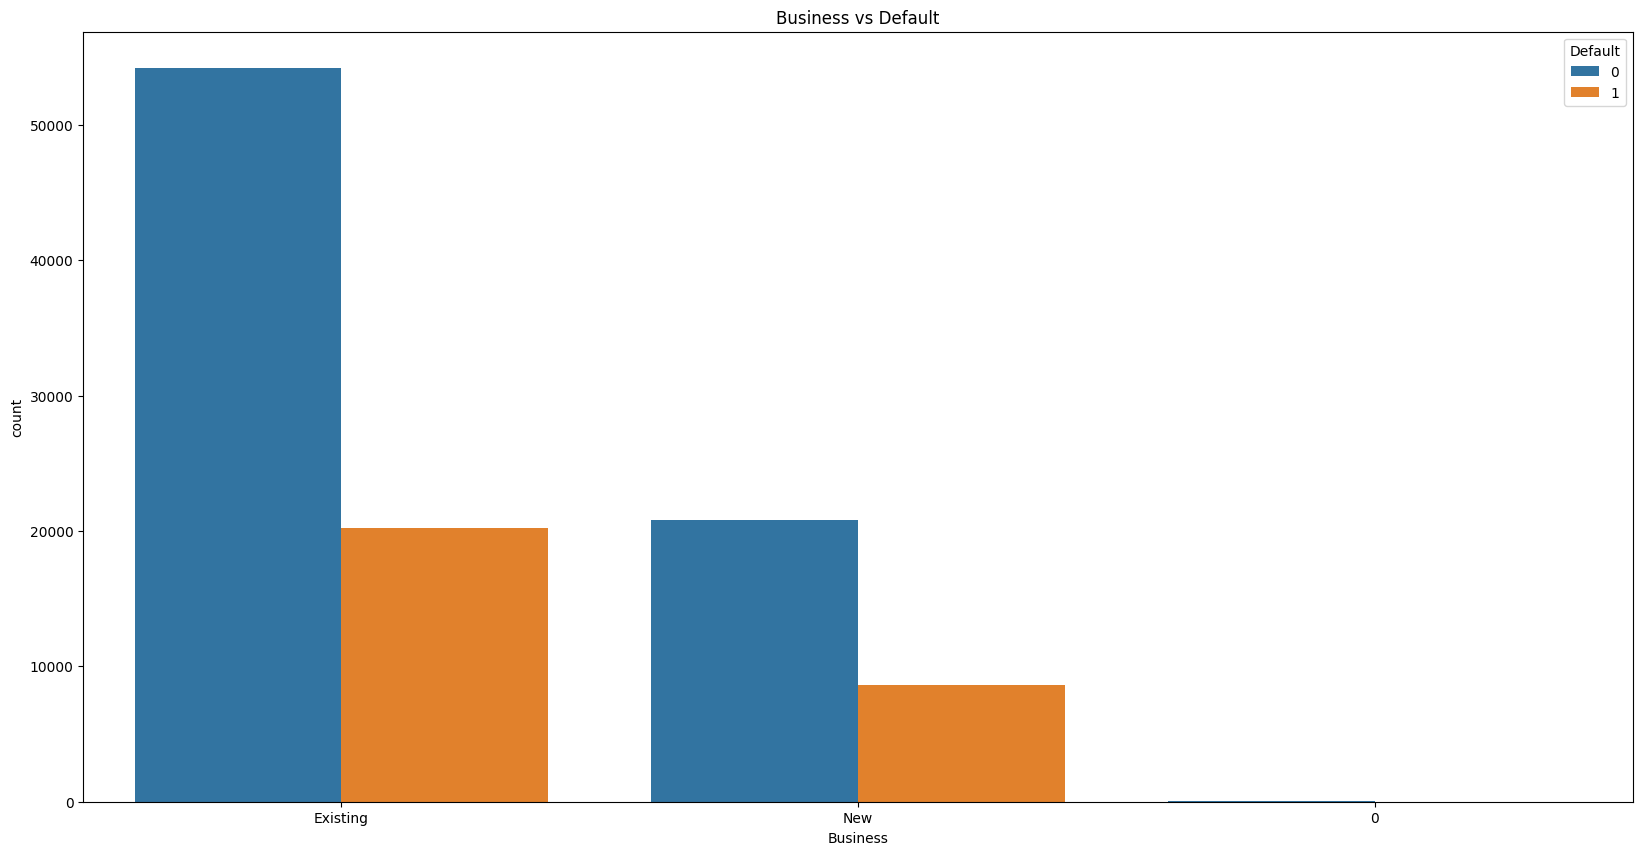

In [101]:
# Business Vs Default

plt.figure(figsize=(20,10))
sns.countplot(x=cat['Business'],hue=cat['Default'])
plt.title(f"Business vs Default")
plt.show()

In [ ]:
# the ratio was similar irrespective of business category
# very minute share with 0

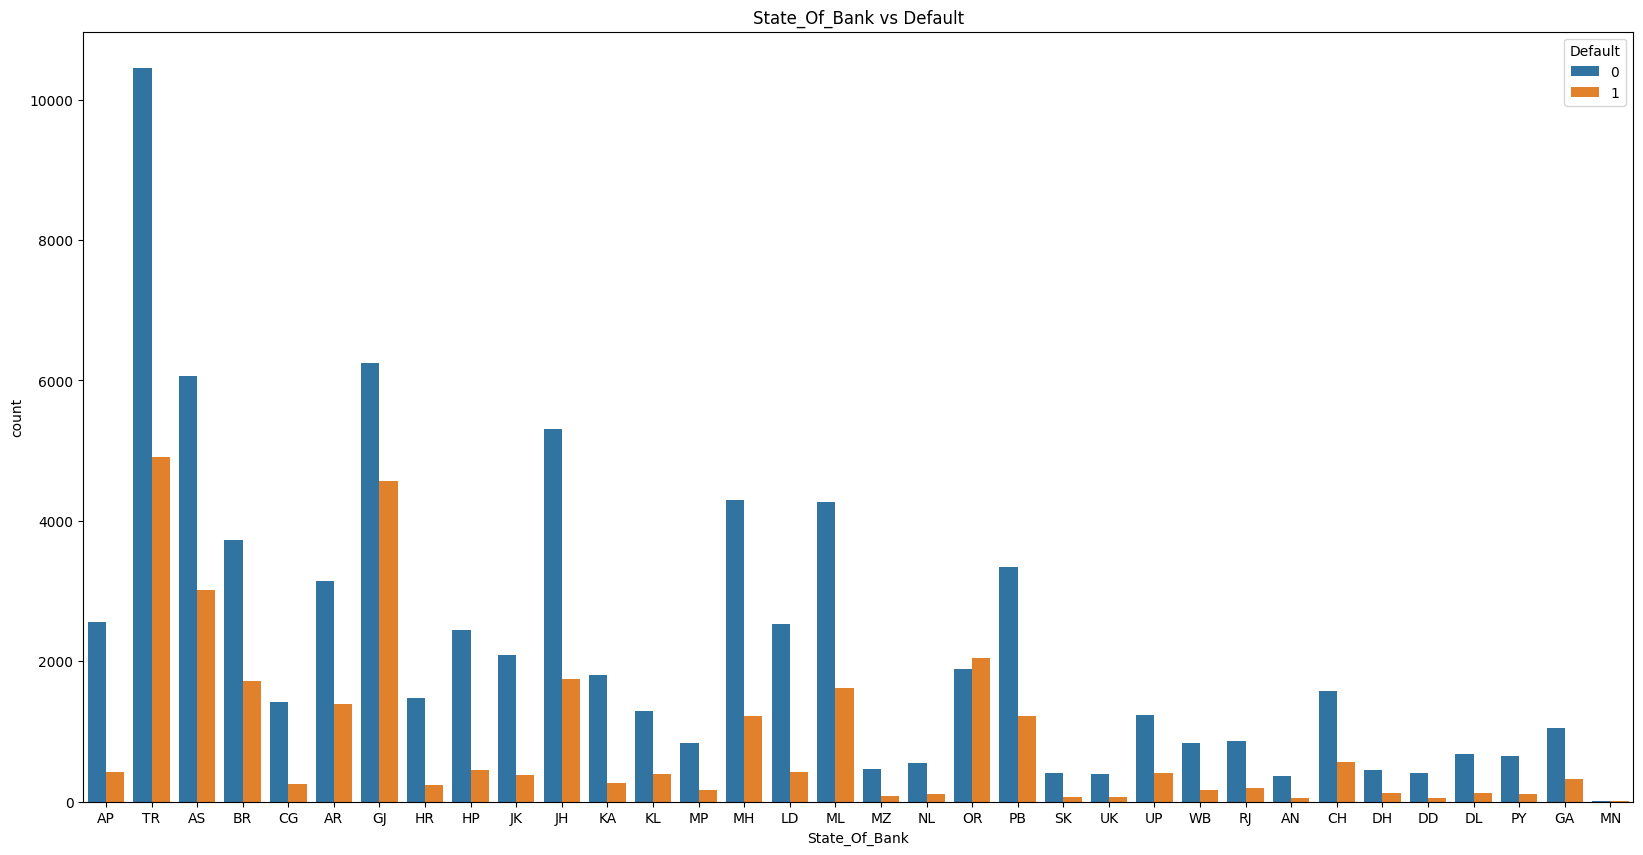

In [102]:
# State_Of_Bank Vs Default

plt.figure(figsize=(20,10))
sns.countplot(x=cat['State_Of_Bank'],hue=cat['Default'])
plt.title(f"State_Of_Bank vs Default")
plt.show()

In [ ]:
# we can observe defaulters were more in orrisa-OR compared to non-defaulters
# Also there were more non-defaulters present in TR
# very minute share with MR